# Task 3

1. Limpieza y Pre-procesamiento

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


In [ ]:
#a. Eliminación de Redundancia
# Cargar dataset
df = pd.read_csv("high_diamond_ranked_10min.csv")
y = df['blueWins'] # Variable objetivo

# Eliminar columnas con Data Leakage o redundancia
X = df.drop(columns=['blueWins', 'gameId'])

# Eliminar todas las columnas del lado rojo
X = X.loc[:, ~X.columns.str.startswith('red')]

X.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [ ]:
#b. Escalado (Obligatorio para SVM)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()

# Ajustar SOLO con train
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar al test
X_test_scaled = scaler.transform(X_test)

'''Si las variables no están escaladas, aquellas con valores más grandes dominan el cálculo del margen, 
afectando negativamente el desempeño del modelo. Ahora, los modelos basados en árboles toman decisiones 
mediante comparaciones y umbrales, no mediante distancias.'''

'Si las variables no están escaladas, aquellas con valores más grandes dominan el cálculo del margen, \nafectando negativamente el desempeño del modelo. El escalado asegura que todas las características contribuyan \nde manera equitativa al modelo, mejorando su rendimiento y capacidad de generalización.'

2. Support Vector Machines:

In [ ]:
#a. Entrene un modelo SVM con Kernel Lineal.
svm_linear = SVC(kernel='linear', random_state=42)

svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)

acc_linear = accuracy_score(y_test, y_pred_linear)

print(f"Accuracy del modelo SVM con Kernel Lineal: {acc_linear:.4f}")

Accuracy del modelo SVM con Kernel Lineal: 0.7196


0.7196356275303644

In [8]:
#b. Entrene un modelo SVM con Kernel RBF (Radial Basis Function)
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy del modelo SVM con Kernel Lineal: {acc_rbf:.4f}")

Accuracy del modelo SVM con Kernel Lineal: 0.7186


In [9]:
#c. Compare el Accuracy de ambos en el set de prueba
results = pd.DataFrame({
    "Modelo": ["SVM Lineal", "SVM RBF"],
    "Accuracy": [acc_linear, acc_rbf]
})

results

,Modelo,Accuracy
0,SVM Lineal,0.719636
1,SVM RBF,0.718623


3.  Árboles de Decisión

In [11]:
#a.  Entrene un DecisionTreeClassifier
dt = DecisionTreeClassifier(
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt

0.6275303643724697

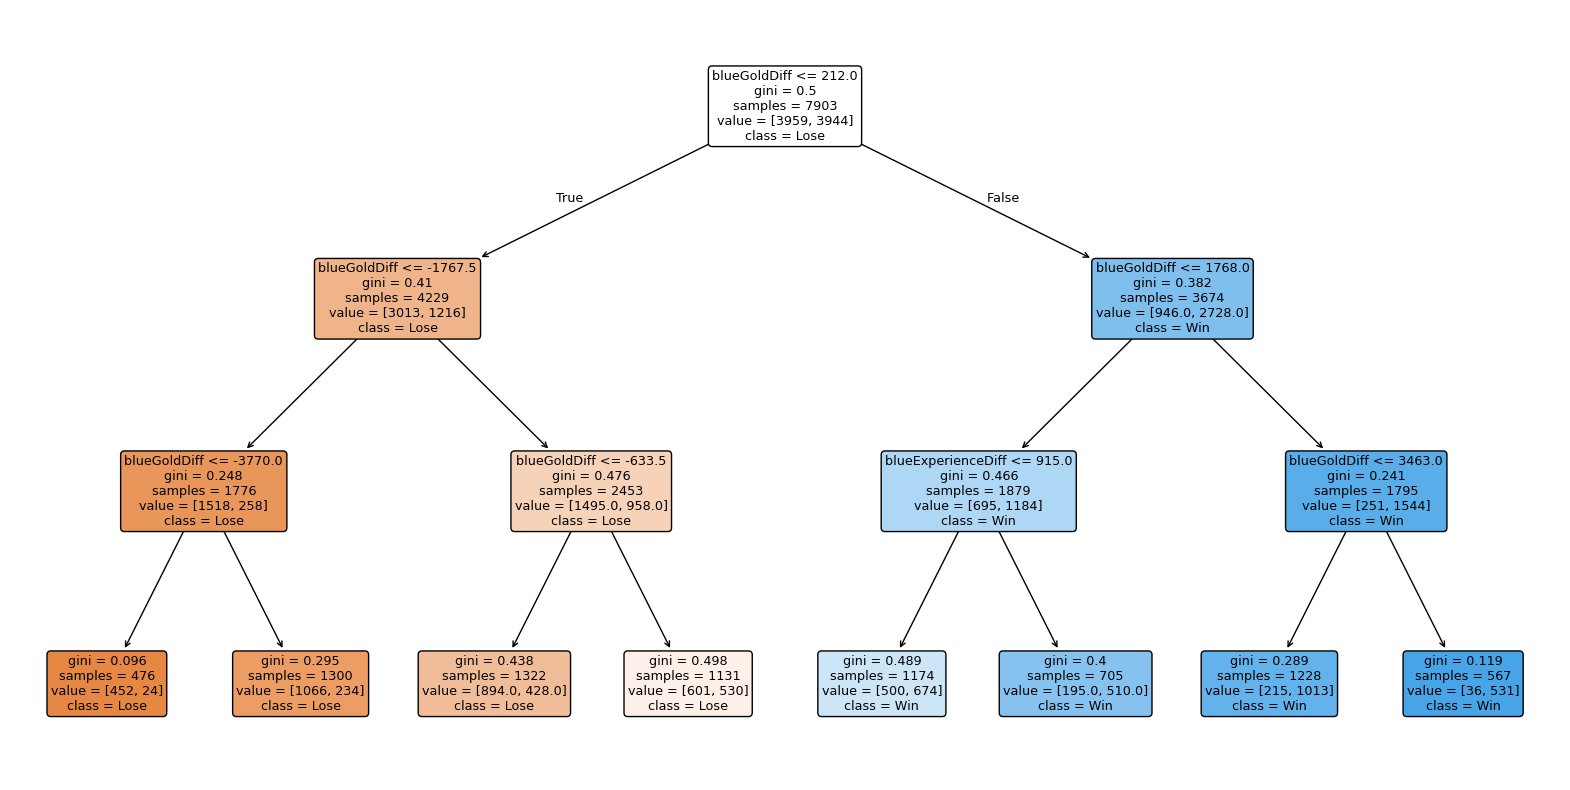

In [13]:
#b. Visualización del árbol
dt_small = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

dt_small.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    dt_small,
    feature_names=X_train.columns,
    class_names=["Lose", "Win"],
    filled=True,
    rounded=True
)
plt.show()

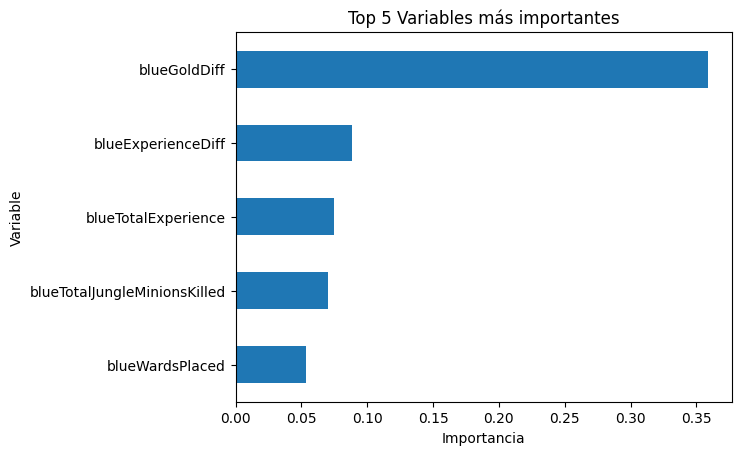

In [ ]:
#c. Varables más importantes
importances = pd.Series(
    dt.feature_importances_,
    index=X_train.columns
)

top5 = importances.sort_values(ascending=False).head(5)

top5.plot(kind='barh')
plt.title("Top 5 Variables más importantes")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.gca().invert_yaxis()
plt.show()

4. Comparación Final: 

In [16]:
#a. ¿Qué modelo tuvo mejor desempeño numérico (Accuracy)? 
results = pd.DataFrame({
    "Modelo": ["SVM Lineal", "SVM RBF", "Árbol de Decisión"],
    "Accuracy": [acc_linear, acc_rbf, acc_dt]
})

results

,Modelo,Accuracy
0,SVM Lineal,0.719636
1,SVM RBF,0.718623
2,Árbol de Decisión,0.627530
